In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('amazon.csv')

# 2. Data Cleaning Function
def clean_currency(x):
    if isinstance(x, str):
        return x.replace('₹', '').replace(',', '').strip()
    return x

# Clean Price Columns
df['discounted_price'] = df['discounted_price'].apply(clean_currency).astype(float)
df['actual_price'] = df['actual_price'].apply(clean_currency).astype(float)

# Clean Discount Percentage
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Clean Rating (Force errors to NaN, then drop them)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

# Drop missing values
df.dropna(inplace=True)

print("✅ Data Cleaned Successfully!")
print(df.head())

✅ Data Cleaned Successfully!
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       2426

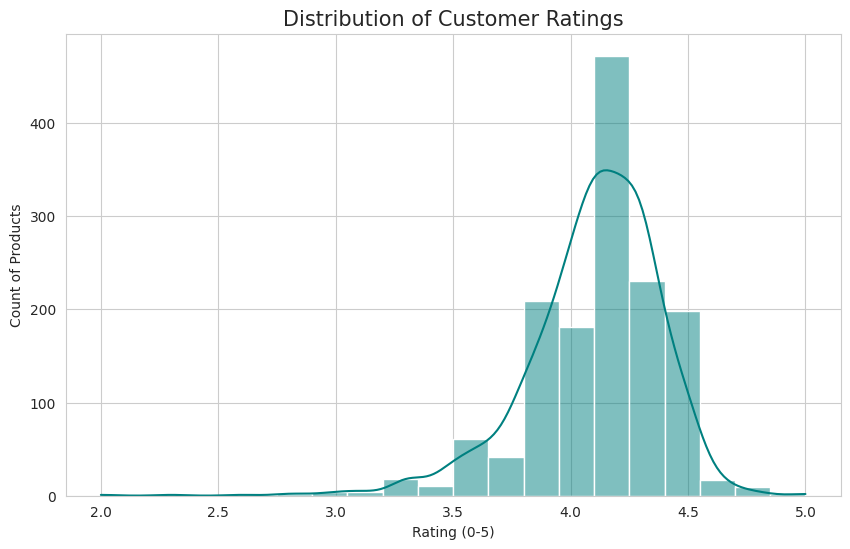

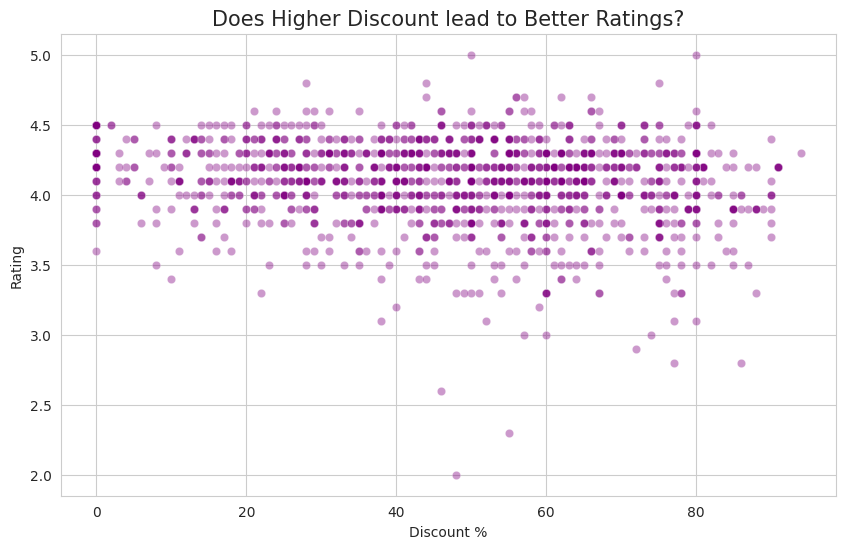

In [2]:
# Set the visual style
sns.set_style("whitegrid")

# Visual 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of Customer Ratings', fontsize=15)
plt.xlabel('Rating (0-5)')
plt.ylabel('Count of Products')
plt.show() # <--- SAVE THIS IMAGE FOR REPORT

# Visual 2: Discount vs. Rating Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df, alpha=0.4, color='purple')
plt.title('Does Higher Discount lead to Better Ratings?', fontsize=15)
plt.xlabel('Discount %')
plt.ylabel('Rating')
plt.show() # <--- SAVE THIS IMAGE FOR REPORT